# Stock Market Data Visualization with Seaborn

## Introduction

This notebook analyzes stock market data to create various visualizations using Seaborn and Matplotlib. We'll explore stock price movements, trading volumes, and price distributions both across companies and for individual companies.

## Setup and Data Loading

First, let's import the necessary libraries and load our stock market data.

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create folders for storing visualizations
main_folder = "data"
if not os.path.exists(main_folder):
     os.makedirs(main_folder)

inter_company = os.path.join(main_folder,'inter_company')
if not os.path.exists(inter_company):
        os.makedirs(inter_company)

# Load the stock market data
df = pd.read_csv('stocks.csv')

## Data Cleaning

Before creating visualizations, we need to check for and handle missing values in our dataset.

In [4]:
print("Missing values before cleaning:")
print(df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date'])
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for column in numeric_columns:
    column_mean = df[column].mean()
    df[column] = df[column].fillna(column_mean)

df['Ticker'] = df['Ticker'].fillna('Unknown')
df = df.dropna()

Missing values before cleaning:
Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Inter-Company Comparisons

In this section, we'll create visualizations that compare different metrics across companies.

### Opening Prices Over Time

This visualization shows how the opening prices of different companies change over time.

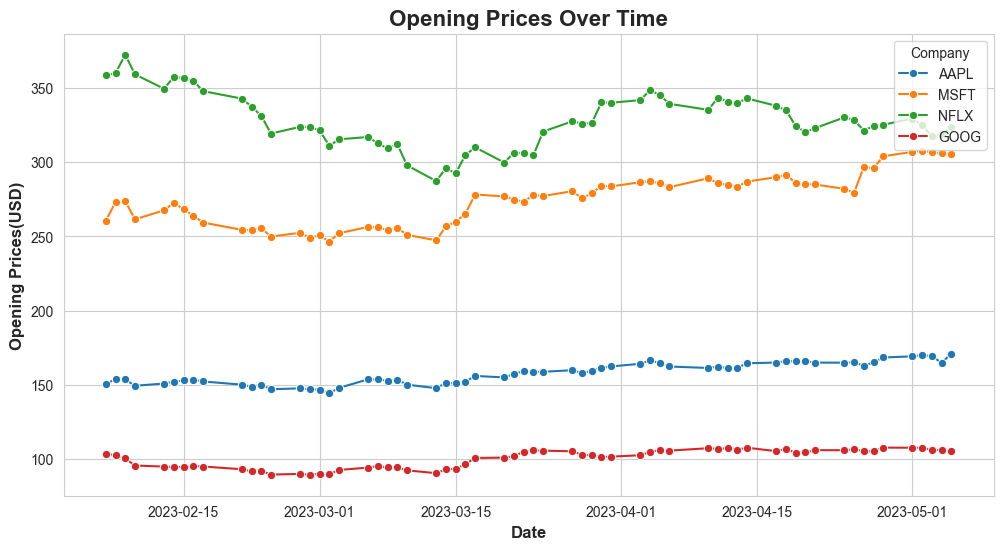

In [5]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(data=df, x='Date', y='Open', hue='Ticker', marker='o')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Opening Prices(USD)', fontsize=12, fontweight='bold')
plt.title('Opening Prices Over Time', fontsize=16, fontweight='bold')
plt.legend(title='Company', loc="upper right")
plt.savefig(f"{inter_company}/OpeningPrices_of_Companies.png")
plt.show()

### Closing Prices Over Time

This visualization shows how the closing prices of different companies change over time.

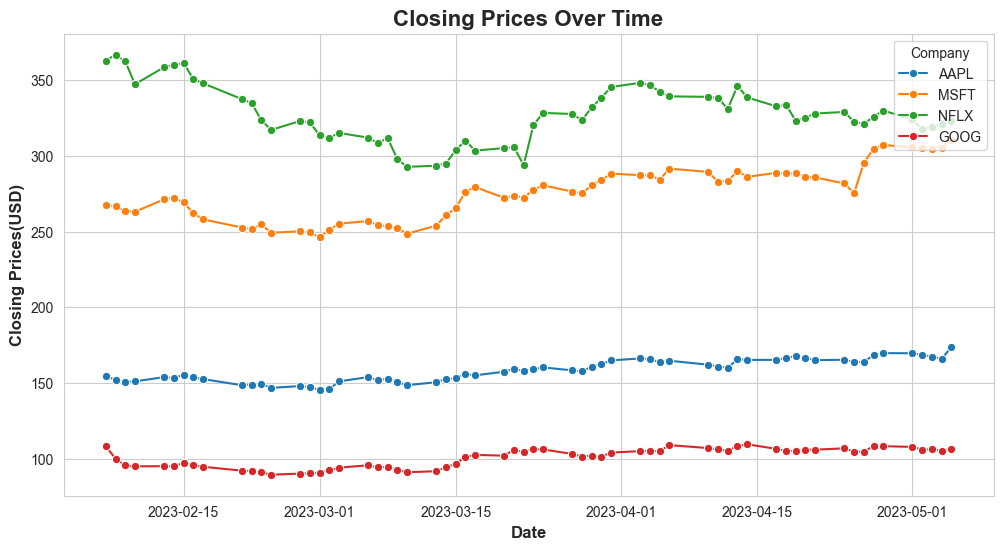

In [6]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(data=df, x='Date', y='Close', hue='Ticker', marker='o')
plt.legend(title='Company', loc="upper right")
plt.title('Closing Prices Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Closing Prices(USD)', fontsize=12, fontweight='bold')
plt.savefig(f"{inter_company}/Closing_Prices.png")
plt.show()

### Highest Closing Price per Company

This bar chart shows the highest closing price that each company's stock reached during the analyzed period.

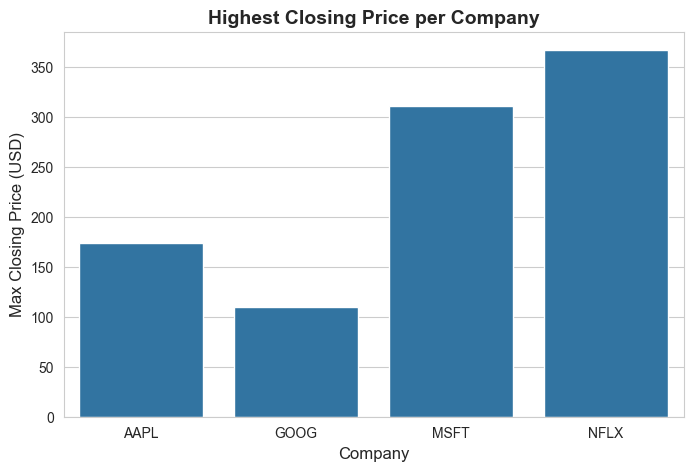

In [7]:
max_close = df.groupby("Ticker")["Close"].max().reset_index()
max_close.rename(columns={"Close": "Max_Close"}, inplace=True)
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=max_close, x="Ticker", y="Max_Close")
plt.title("Highest Closing Price per Company", fontsize=14, fontweight='bold')
plt.xlabel("Company", fontsize=12)
plt.ylabel("Max Closing Price (USD)", fontsize=12)
plt.savefig(f"{inter_company}/Highest_Closing.png")
plt.show()

### Daily Price Range Over Time

This visualization shows the daily price range (High price - Low price) for each company over time. The shaded areas represent the magnitude of price volatility.

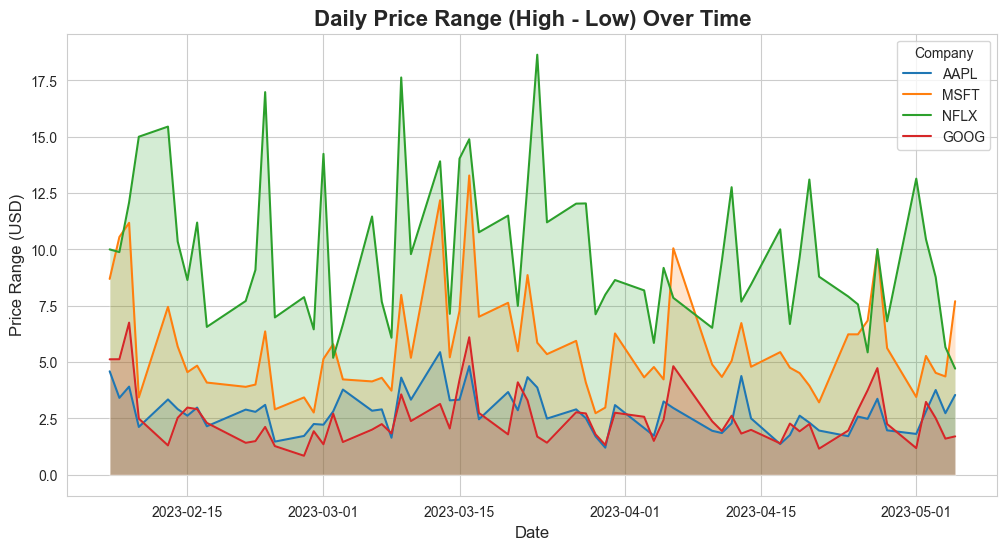

In [8]:
df['Daily_Range'] = df['High'] - df['Low']
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
for company in df['Ticker'].unique():
    company_data = df[df['Ticker'] == company]
    sns.lineplot(data=company_data, x='Date', y='Daily_Range', label=company)
    plt.fill_between(company_data['Date'], company_data['Daily_Range'], alpha=0.2)
plt.title("Daily Price Range (High - Low) Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price Range (USD)", fontsize=12)
plt.legend(title='Company')
plt.savefig(f"{inter_company}/Daily_Price_Range.png")
plt.show()

### Total Trading Volume by Company

This pie chart shows the proportion of total trading volume attributable to each company during the analyzed period.

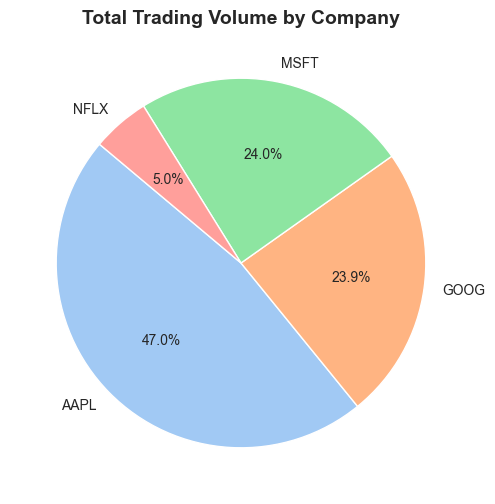

In [9]:
volume_by_company = df.groupby('Ticker')['Volume'].sum()
plt.figure(figsize=(6, 6))
plt.pie(volume_by_company, labels=volume_by_company.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Total Trading Volume by Company', fontsize=14, fontweight='bold')
plt.savefig(f"{inter_company}/Trading_Volume.png")
plt.show()

### Distribution of Opening Prices

This histogram shows the distribution of opening prices across all companies and dates, providing insight into the most common price ranges.

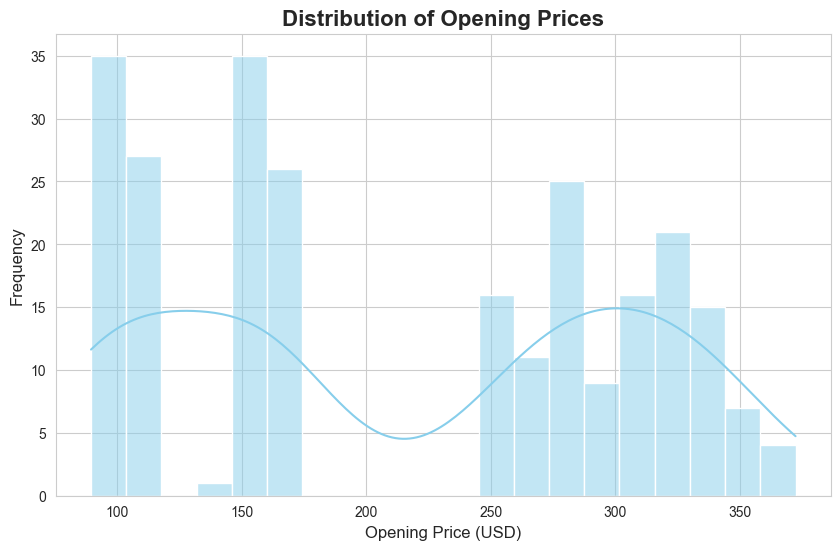

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Open", bins=20, kde=True, color="skyblue")
plt.title("Distribution of Opening Prices", fontsize=16, fontweight='bold')
plt.xlabel("Opening Price (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.savefig(f"{inter_company}/Distribution_OpeningPrc.png")
plt.show()

### Volume vs Adjusted Close Price

This scatter plot visualizes the relationship between trading volume and adjusted close price for each company.

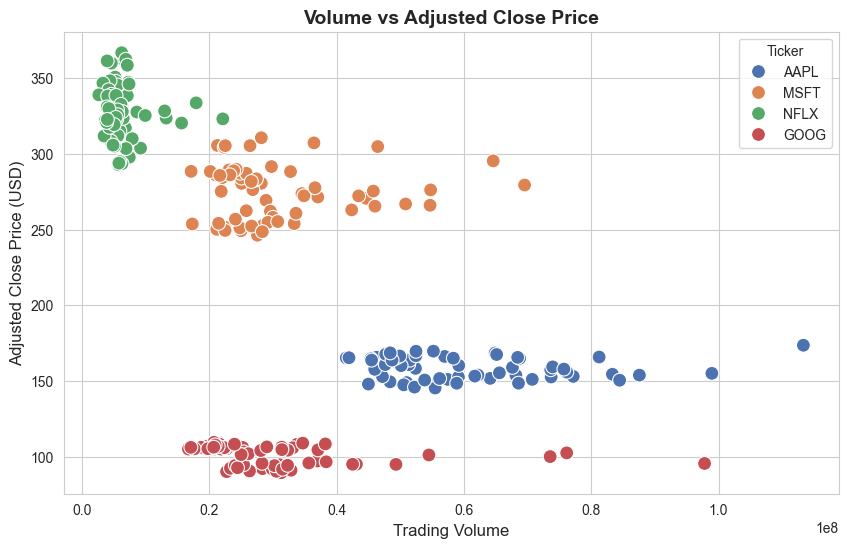

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Volume", y="Adj Close", hue="Ticker", palette="deep", s=100)
plt.title("Volume vs Adjusted Close Price", fontsize=14, fontweight='bold')
plt.xlabel("Trading Volume", fontsize=12)
plt.ylabel("Adjusted Close Price (USD)", fontsize=12)
plt.savefig(f"{inter_company}/Vol_vs_AdjClose.png")
plt.show()

## Company-Specific Visualizations

In this section, we'll create visualizations for each individual company to analyze their stock performance more deeply.

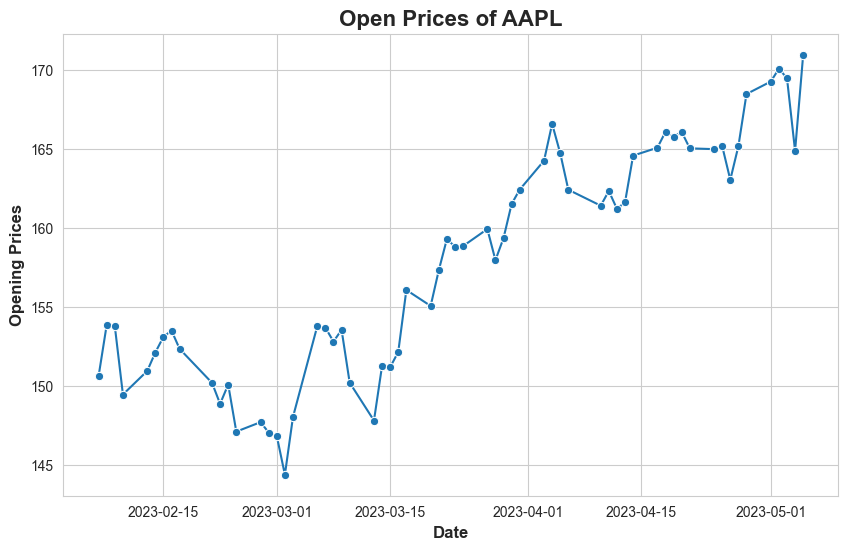

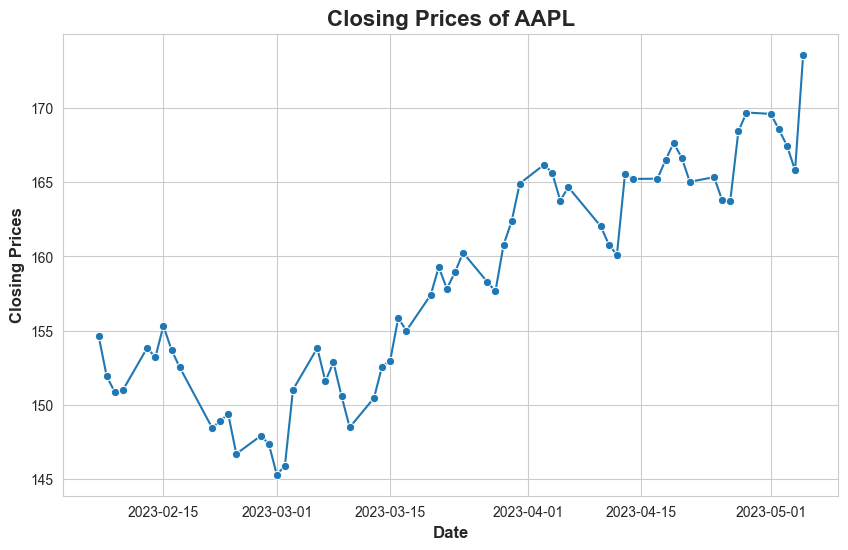

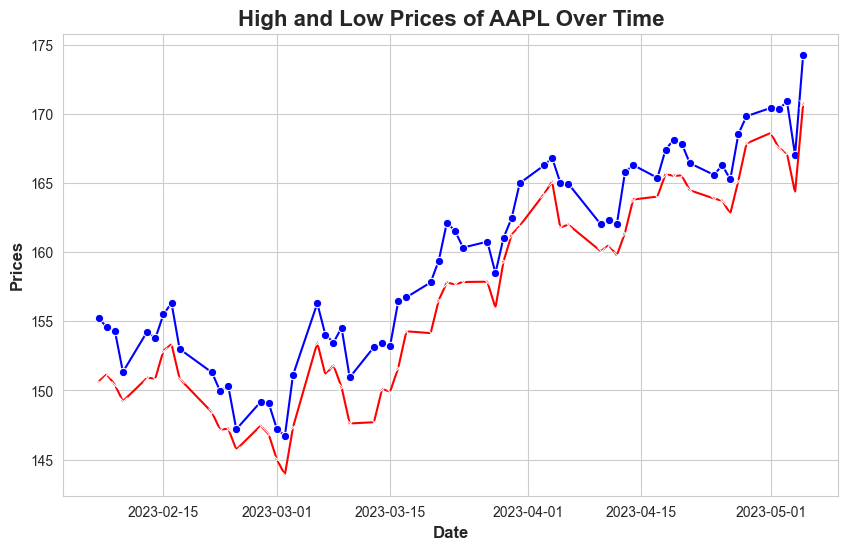

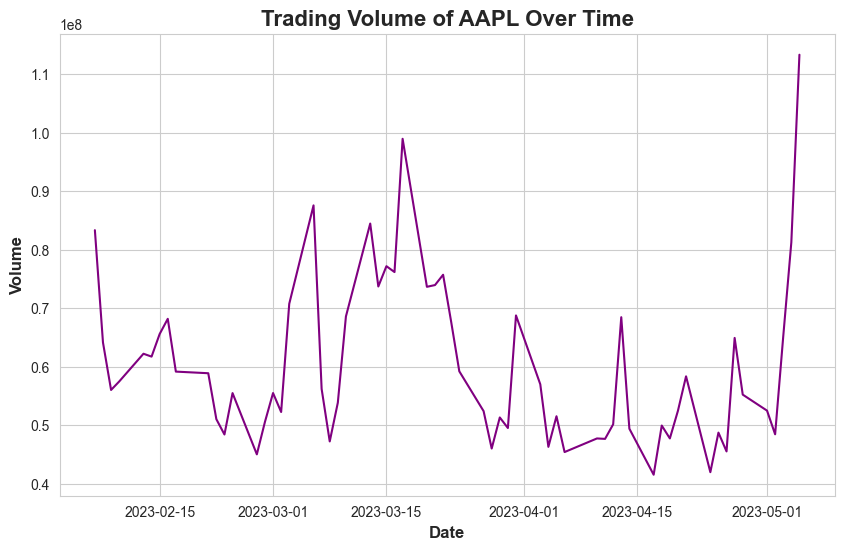

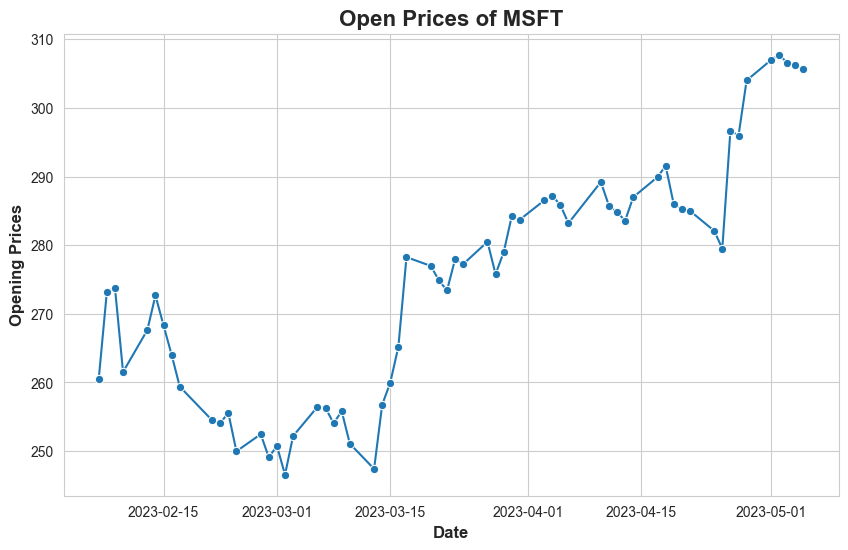

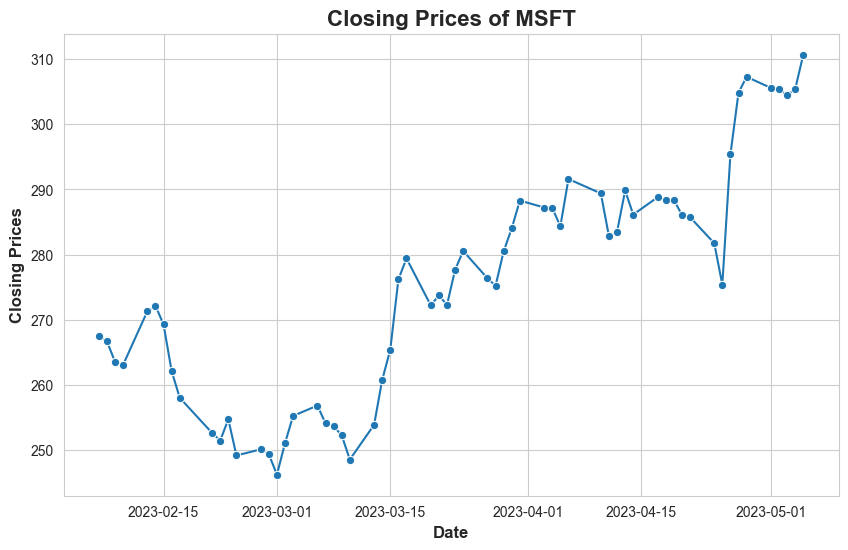

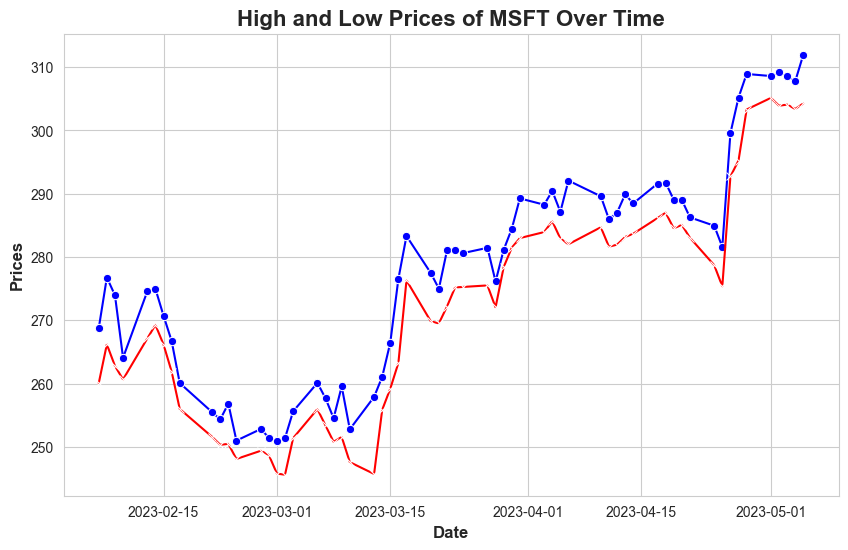

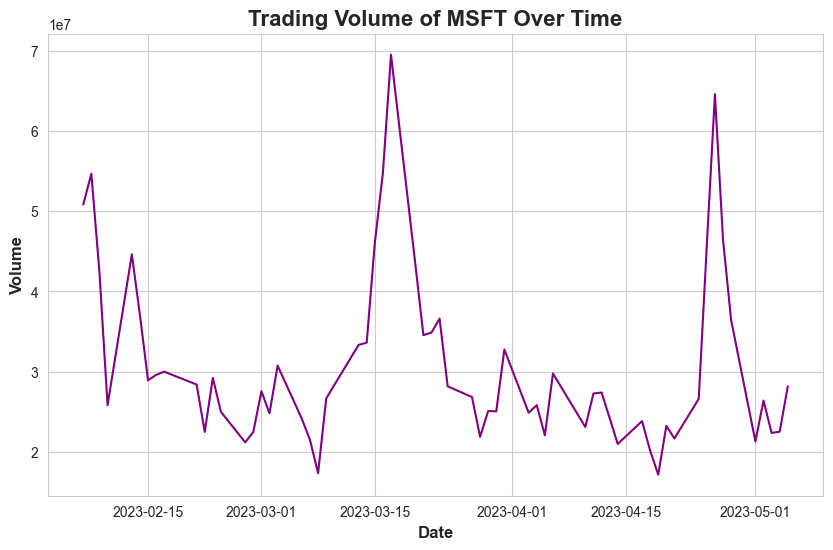

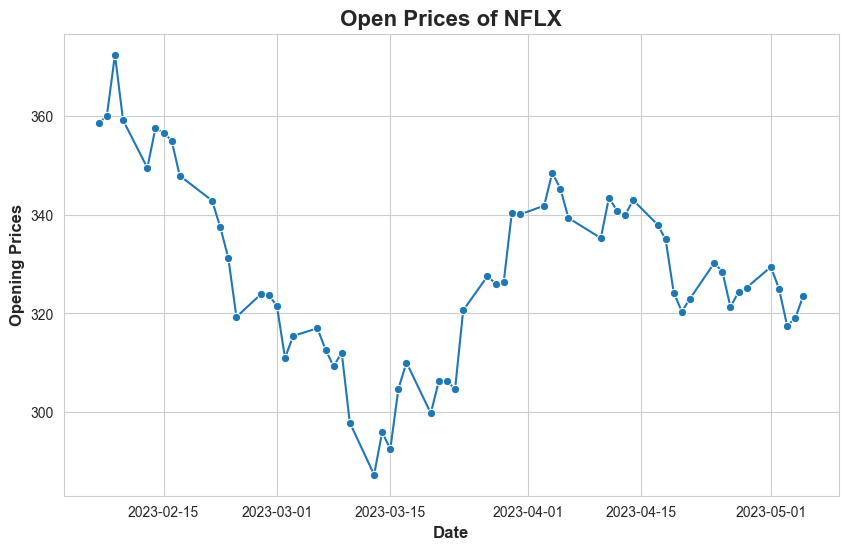

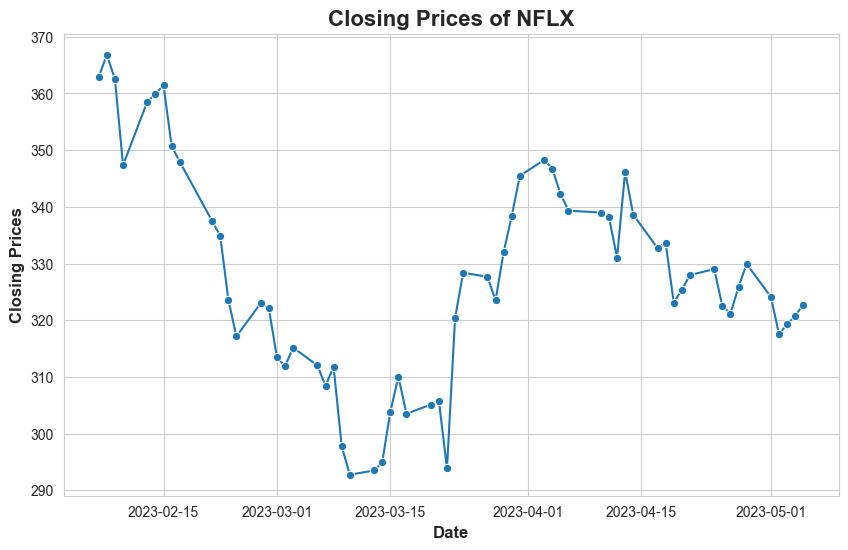

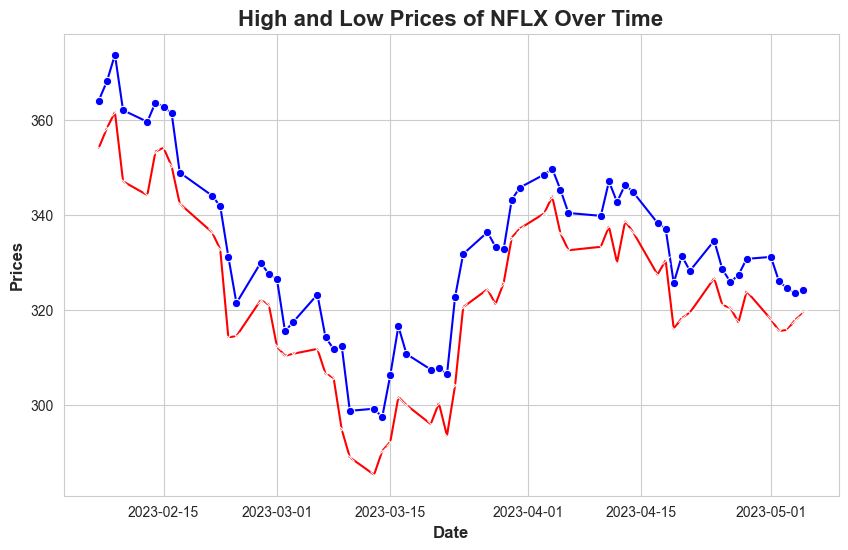

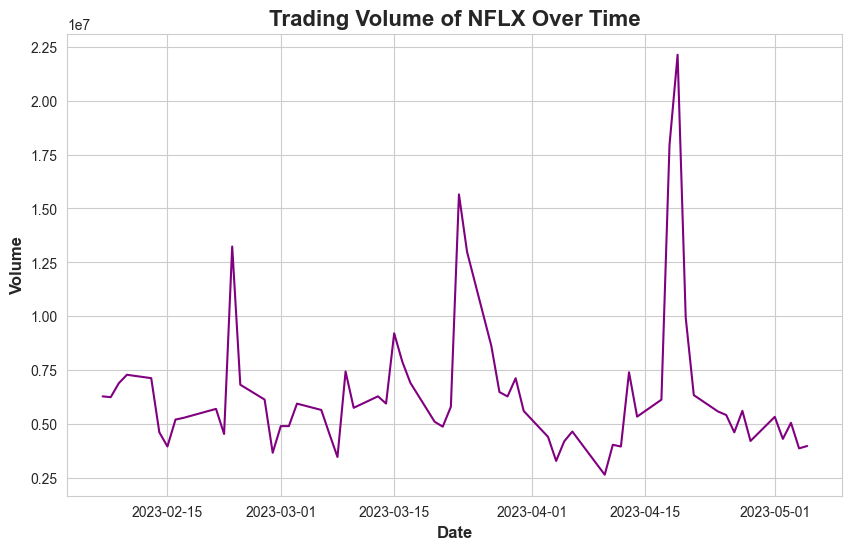

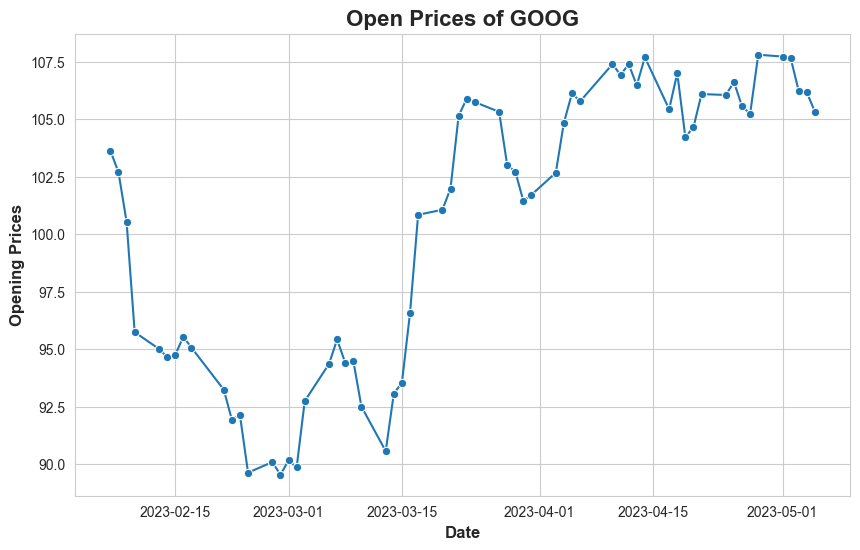

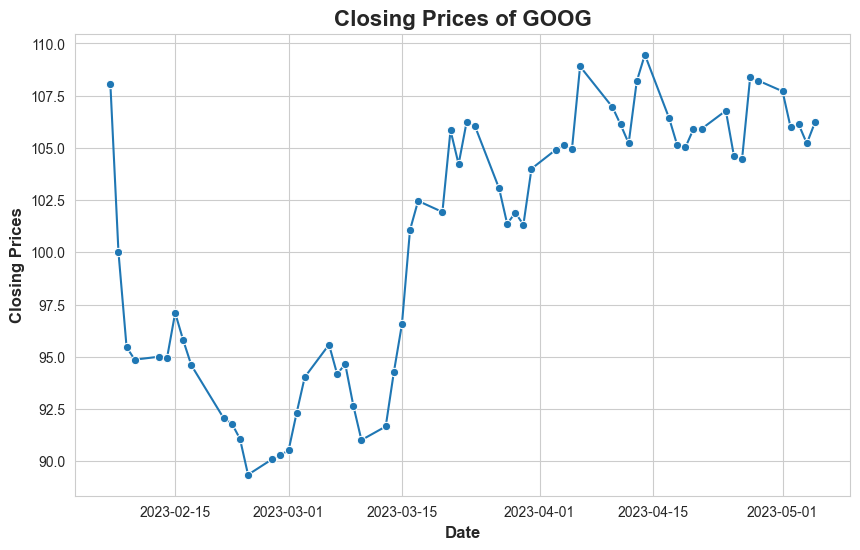

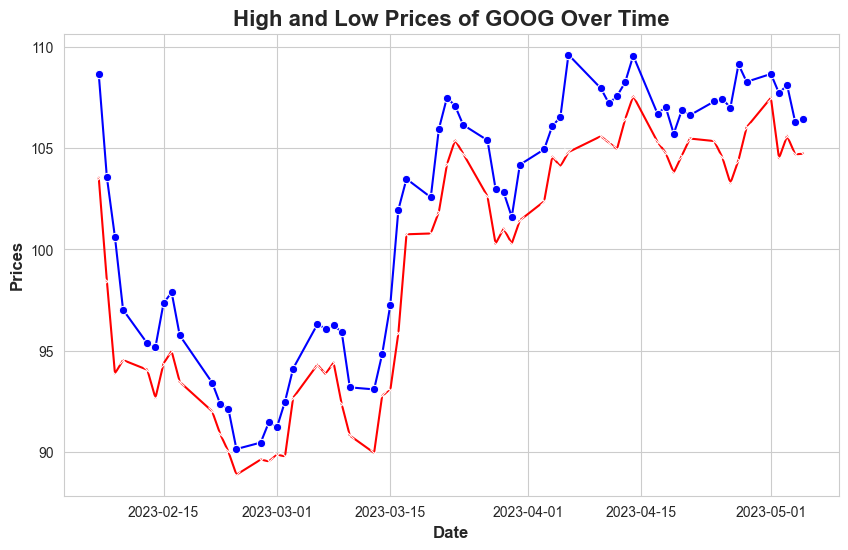

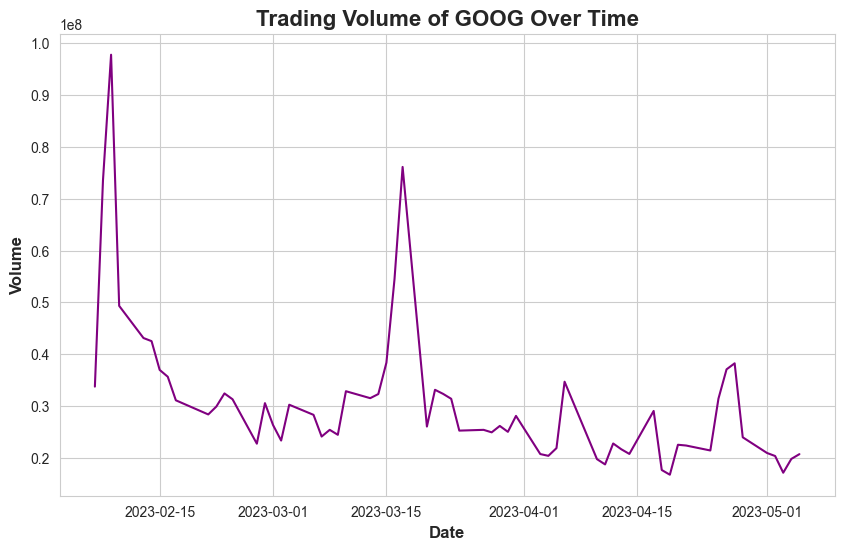

In [12]:
companies = df['Ticker'].unique()
for company in companies:
    df_cmp = df[df['Ticker']==company]
    
    # Create folder for company
    company_folder = os.path.join(main_folder, company)
    if not os.path.exists(company_folder):
        os.makedirs(company_folder)
    
    # Opening Prices
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_cmp, x='Date', y='Open', marker='o')
    plt.title(f"Open Prices of {company}", fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12, fontweight='bold')
    plt.ylabel('Opening Prices', fontsize=12, fontweight='bold')
    plt.savefig(f"{company_folder}/{company}_OpenPrice.png")
    plt.show()
    
    # Closing Prices
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_cmp, x='Date', y='Close', marker='o')
    plt.title(f"Closing Prices of {company}", fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12, fontweight='bold')
    plt.ylabel('Closing Prices', fontsize=12, fontweight='bold')
    plt.savefig(f"{company_folder}/{company}_ClosePrice.png")
    plt.show()
    
    # High and Low Prices
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_cmp, x='Date', y='High', marker='o', color='Blue')
    sns.lineplot(data=df_cmp, x='Date', y='Low', marker='x', color='red')
    plt.title(f"High and Low Prices of {company} Over Time", fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12, fontweight='bold')
    plt.ylabel('Prices', fontsize=12, fontweight='bold')
    plt.savefig(f"{company_folder}/{company}_Prices.png")
    plt.show()
    
    # Trading Volume
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_cmp, x='Date', y='Volume', color='purple')
    plt.title(f"Trading Volume of {company} Over Time", fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12, fontweight='bold')
    plt.ylabel('Volume', fontsize=12, fontweight='bold')
    plt.savefig(f"{company_folder}/{company}_Volume.png")
    plt.show()

## Conclusion

In this notebook, we've explored stock market data through various visualizations using Seaborn and Matplotlib. We examined price movements, trading volumes, and distributions both across companies and for individual companies. These visualizations provide insights into stock performance, volatility, and trading patterns during the analyzed period.